### 회귀 분석 순서

1. 데이터를 확인
2. 데이터를 정제
3. 데이터를 분할
4. 데이터를 스케일링
5. 모델 학습
6. 성능 평가 및 예측값 저장

In [36]:
import pandas as pd

In [37]:
# boston.csv 파일 로드

boston = pd.read_csv('../../csv/boston.csv')

데이터 로드 이후 데이터 확인
    - 구조 : info, head/tail

In [38]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [41]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

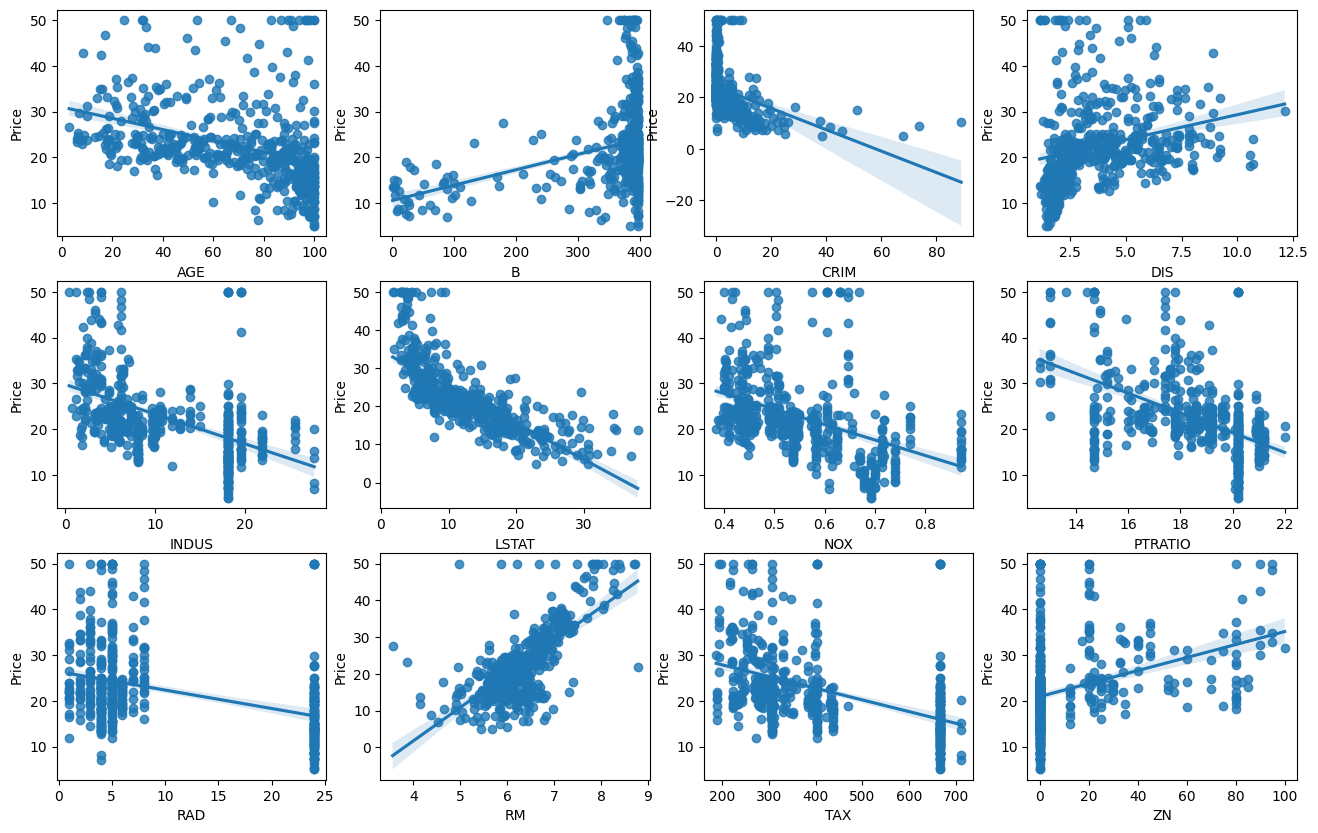

In [91]:
# 데이터의 분포도를 확인
# price와 나머지 컬럼들의 데이터 분포도 확인

# 그래프를 12개의 공간으로 나눠준다.

fig, axs = plt.subplots(
    figsize = (16, 10),
    ncols= 4,
    nrows= 3,
)



# 특정 컬럼의 이름을 제거한 리스트를 생성

features = boston.columns.difference(['Price', 'CHAS'])



for i, feature in zip(range(12), features):

# i는 0부터 11까지 반복
# 좌표 값을 생성

    row = int(i/4)
    col = i % 4

    sns.regplot(
        x = feature,
        y = boston['Price'],
        data= boston,
        ax= axs[row][col]
    )

plt.show()


In [44]:
# 데이터를 분할

from sklearn.model_selection import train_test_split

from random import randint

In [90]:
features

'ZN'

In [92]:
# 독립변수(x), 종속변수(y) 설정

x = boston[features].values

y = boston['Price'].values

# 데이터 분할

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=randint(1,100))

In [93]:
print('train 데이터에서 price의 평균 : ', y_train.mean())
print('test 데이터에서 price의 평균 : ', y_test.mean())

train 데이터에서 price의 평균 :  22.38638613861386
test 데이터에서 price의 평균 :  23.112745098039216


In [94]:
# 스케일러 이용하여 각 데이터들의 범위를 고정
# min-max 스케일러를 이용한 스케일링

from sklearn.preprocessing import MinMaxScaler


In [102]:
# class 생성

scaler = MinMaxScaler()

# 범위를 잡을 데이터 셋 fitting

x_train_sc = scaler.fit_transform(x_train)

x_test_sc = scaler.fit_transform(x_test)

In [103]:
# 모델 학습
# 회귀 분석(linearRegression)

from sklearn.linear_model import LinearRegression

In [104]:
linear = LinearRegression()

In [105]:
# 모델 학습 데이터를 대입

linear.fit(x_train_sc, y_train)

LinearRegression()

In [106]:
# predict() 함수를 이용하여 학습 데이터를 예측한 값 저장

pred = linear.predict(x_train_sc)
pred

array([19.70477331, 26.99466454, 26.52679062, 20.4706961 , 22.39662962,
       21.33101333, 13.80605569, 16.17005954, 23.77481367, 10.96254178,
        8.95638378, 20.74771743, 25.90016902, 30.47795612, 15.03009073,
       12.91526378, 15.9918856 , 38.81804119, 22.73316521, 22.11722512,
       27.24621193,  3.37207308, 26.56814527, 31.0159016 , 20.06848631,
       33.03054579, 30.38794207, 12.1458974 , 23.31263077, 19.69881086,
       15.90010681, 19.42904064, 20.56924339, 19.10162774, 18.54290694,
       28.44331165, 29.60617575, 21.47153474, 34.31073696, 23.18750758,
       22.18579723, 19.93791601, 14.6700908 , 19.88537548, 20.52930668,
       14.19019178, 16.26425395, 21.88375825, 30.53989139, 13.89756568,
       30.10882179, 28.64871575, 33.91429327,  6.34209458, 16.0933396 ,
       17.65073178, 21.63866322, 11.73357156, 24.00457019, 21.90265576,
       21.91927844, 20.85224311, 25.03862704, 20.52035565, 21.16022474,
       33.51415619, 25.02500913, 24.42403084, 20.78462175, 25.98

In [107]:
# test 데이터를 이용한 예측값 저장

pred_t = linear.predict(x_test_sc)

In [108]:
pred_df = pd.DataFrame(pred, columns=['pred price'])

actual = pd.DataFrame(y_train, columns=['actual price'])

In [109]:
df = pd.concat([pred_df, actual], axis=1)

df.head()

,pred price,actual price
0,19.704773,24.3
1,26.994665,27.1
2,26.526791,23.8
3,20.470696,21.7
4,22.396630,25.0


In [110]:
pred_t_df = pd.DataFrame(pred_t, columns=['pred price'])

actual2 = pd.DataFrame(y_test, columns=['actual price'])

df2 = pd.concat([pred_t_df, actual2], axis=1)

df2.head()

,pred price,actual price
0,8.765805,14.4
1,24.115693,33.0
2,27.279071,29.8
3,23.292295,21.2
4,37.789120,46.7
